In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import pandas as pd



In [2]:
data = np.random.normal(loc=50, scale=10, size=1000)


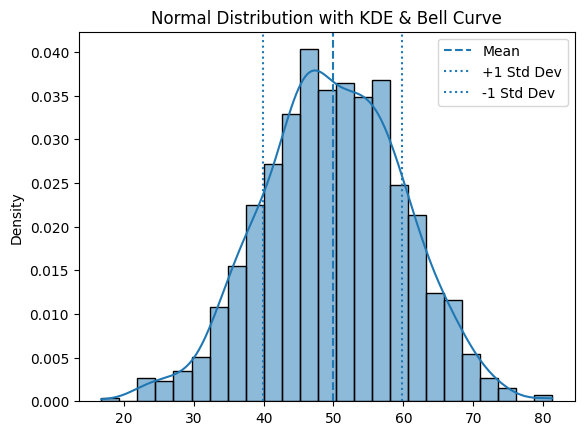

In [ ]:
mean = np.mean(data)
std = np.std(data)

sns.histplot(data, kde=True, stat="density")
plt.axvline(mean, linestyle="--", label="Mean")
plt.axvline(mean + std, linestyle=":", label="+1 Std Dev")
plt.axvline(mean - std, linestyle=":", label="-1 Std Dev")

# Bell curve
x = np.linspace(min(data), max(data), 100)
plt.plot(x, norm.pdf(x, mean, std), label="Normal PDF")

plt.title("Normal Distribution with KDE & Bell Curve")
plt.legend()
plt.show()


In [5]:

df = pd.DataFrame({
    "Scores": np.random.randint(40, 100, 50)
})

df.head()

,Scores
0,51
1,55
2,87
3,81
4,70


In [6]:
q1 = np.percentile(df["Scores"], 25)
q2 = np.percentile(df["Scores"], 50)
q3 = np.percentile(df["Scores"], 75)

q1, q2, q3


(np.float64(56.25), np.float64(64.5), np.float64(82.75))

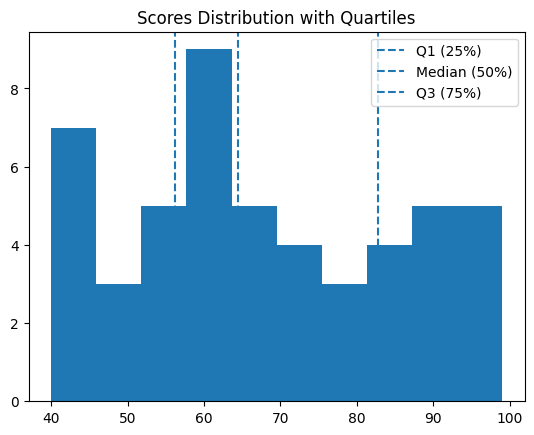

In [7]:
plt.hist(df["Scores"], bins=10)
plt.axvline(q1, linestyle="--", label="Q1 (25%)")
plt.axvline(q2, linestyle="--", label="Median (50%)")
plt.axvline(q3, linestyle="--", label="Q3 (75%)")
plt.legend()
plt.title("Scores Distribution with Quartiles")
plt.show()


In [8]:
summary = {
    "Min": df["Scores"].min(),
    "Q1": df["Scores"].quantile(0.25),
    "Median": df["Scores"].median(),
    "Q3": df["Scores"].quantile(0.75),
    "Max": df["Scores"].max()
}

summary


{'Min': 40,
 'Q1': np.float64(56.25),
 'Median': 64.5,
 'Q3': np.float64(82.75),
 'Max': 99}

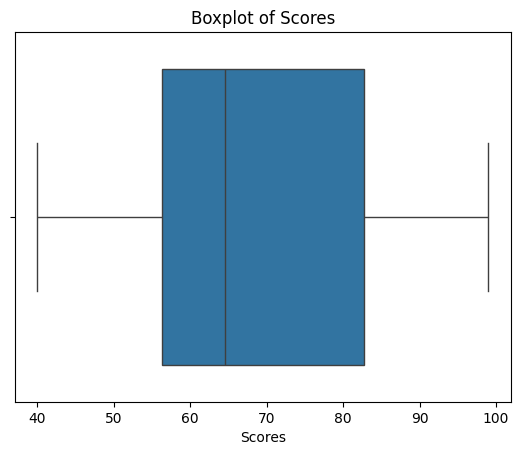

In [9]:
sns.boxplot(x=df["Scores"])
plt.title("Boxplot of Scores")
plt.show()


In [11]:
Q1 = df["Scores"].quantile(0.25)
Q3 = df["Scores"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Scores"] < Q1 - 1.5*IQR) | (df["Scores"] > Q3 + 1.5*IQR)]
outliers


,Scores


### Inferential Statistics
Inferential statistics uses sample data to make predictions or conclusions about a population.

**Real-world applications:**
- Election polling
- Clinical trials
- A/B testing in marketing
- Quality control
- Machine learning model evaluation


In [12]:
population = pd.DataFrame({
    "Income": np.random.normal(50000, 8000, 1000)
})


In [13]:
sample = population.sample(100)

population_mean = population["Income"].mean()
sample_mean = sample["Income"].mean()

population_mean, sample_mean


(np.float64(50129.87028853978), np.float64(50086.56337960875))

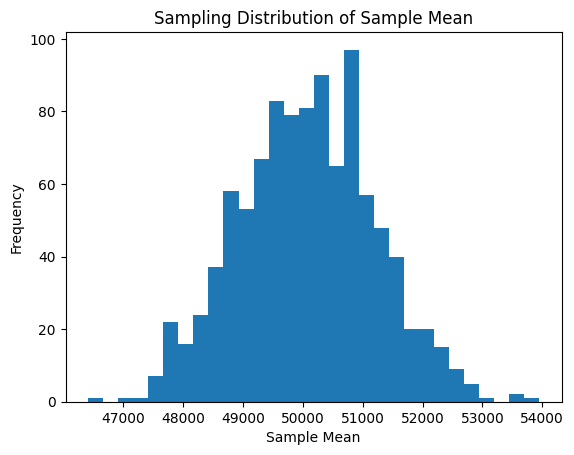

In [14]:
sample_means = []

for i in range(1000):
    sample = population.sample(50)
    sample_means.append(sample["Income"].mean())

plt.hist(sample_means, bins=30)
plt.title("Sampling Distribution of Sample Mean")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()
